# Loan Default Risk Analysis 

[Source from Kaggle](https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter/code?datasetId=807638&sortBy=voteCou)

**Objective** <br>
Identify specific groups of features with a higher(or lower) chance of loan default based on the application form.

## 0. Set up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/application_data.csv')
description = pd.read_csv('data/columns_description.csv')

# if want to return the description of certain column
def desc(x) :
    desc = description[['Row','Description']].loc[description['Row']==x, 'Description']
    return desc.iloc[0] if not desc.empty else None

## 1. Exploring Data
 - **Index** 307,511
 - **Columns** 122
 - **Default Rate in the entire dataset** 8.07%

In [2]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(307511, 122)

In [4]:
#df.info(verbose=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
DefaultRate =df.groupby('TARGET').size()[1]/df.groupby('TARGET').size().sum() * 100
print(f'Default Rate in entire dataset: {round(DefaultRate,2)} %')

Default Rate in entire dataset: 8.07 %


## 2. Identify unnecessary columns

The first step of the project is to remove unnecessary columns that do not provide enough information for the project's objective. <br>
 - **76 columns deleted**
 - **New dataframe with adjusted columns `df1`**

In [6]:
originalcolumn=df.columns.tolist()

### 2.1. Missing value
Remove columns that have more than 40% missing values. <br>
**49 columns deleted**

In [7]:
columnlist_null = df.isnull().sum() / df.shape[0] * 100

In [8]:
column_unnecessary = columnlist_null[columnlist_null>40].index.tolist()
column_unnecessary

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

### 2.2. Document Submission

A set of columns indicates whether certain documents were submitted. However, since most of them were not submitted, they provide little meaningful information, except for 'document3.

**19 columns deleted**


In [10]:
FlagDocCol = []

for x in df.columns:
    if 'FLAG_DOCUMENT' in x :
        FlagDocCol.append(x)

df[FlagDocCol].sum()        

FLAG_DOCUMENT_2         13
FLAG_DOCUMENT_3     218340
FLAG_DOCUMENT_4         25
FLAG_DOCUMENT_5       4648
FLAG_DOCUMENT_6      27078
FLAG_DOCUMENT_7         59
FLAG_DOCUMENT_8      25024
FLAG_DOCUMENT_9       1198
FLAG_DOCUMENT_10         7
FLAG_DOCUMENT_11      1203
FLAG_DOCUMENT_12         2
FLAG_DOCUMENT_13      1084
FLAG_DOCUMENT_14       903
FLAG_DOCUMENT_15       372
FLAG_DOCUMENT_16      3053
FLAG_DOCUMENT_17        82
FLAG_DOCUMENT_18      2500
FLAG_DOCUMENT_19       183
FLAG_DOCUMENT_20       156
FLAG_DOCUMENT_21       103
dtype: int64

In [11]:
FlagDocCol.remove('FLAG_DOCUMENT_3')

In [12]:
column_unnecessary = column_unnecessary + FlagDocCol

len(column_unnecessary)

68

### 2.3. External source

Several columns labeled "external source" have ambiguous meanings. No clear correlation was found between these external sources and loan default.<br>
**2 columns deleted**

In [13]:
desc('EXT_SOURCE_2')

'Normalized score from external data source'

<Axes: >

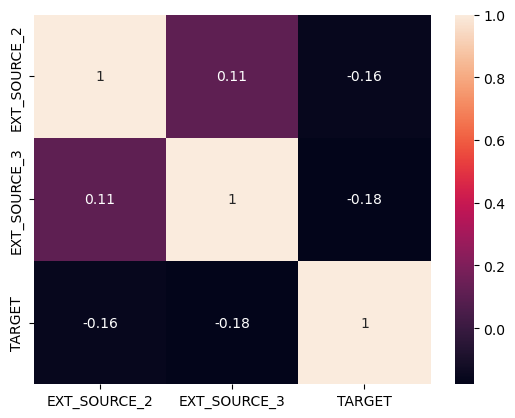

In [14]:
sns.heatmap(df[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),annot=True)

In [15]:
column_unnecessary = column_unnecessary + ['EXT_SOURCE_2', 'EXT_SOURCE_3']

In [16]:
len(column_unnecessary)

70

### 2.4. contact information 
Personal contatct information is also unnecessary <br>
**6 columns deleted**

In [17]:
contactInfo= ['FLAG_MOBIL', 'FLAG_EMP_PHONE',
          'FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']
contactInfo + ['TARGET']



df[contactInfo + ['TARGET']].corr()['TARGET']


FLAG_MOBIL          0.000534
FLAG_EMP_PHONE      0.045982
FLAG_WORK_PHONE     0.028524
FLAG_CONT_MOBILE    0.000370
FLAG_PHONE         -0.023806
FLAG_EMAIL         -0.001758
TARGET              1.000000
Name: TARGET, dtype: float64

In [18]:
column_unnecessary = column_unnecessary + contactInfo

In [19]:
len(column_unnecessary)

76

### 2.5 New dataframe with the adjusted columns `df1`

In [21]:
df1=df.loc[:,[x for x in originalcolumn if x not in column_unnecessary]]

## 3. Categorical Data Analysis
**Strategy**
1. Group the data by the values in the categorical column.
2. Calculate the default rate for each group
3. Identify the group with a defualt rate lower than 5% or higher than 11%
   - The default rate in the entire dataset (all applicants) is approximately 8%.

In [22]:
df1.select_dtypes(include=['object', 'category']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NAME_CONTRACT_TYPE          307511 non-null  object
 1   CODE_GENDER                 307511 non-null  object
 2   FLAG_OWN_CAR                307511 non-null  object
 3   FLAG_OWN_REALTY             307511 non-null  object
 4   NAME_TYPE_SUITE             306219 non-null  object
 5   NAME_INCOME_TYPE            307511 non-null  object
 6   NAME_EDUCATION_TYPE         307511 non-null  object
 7   NAME_FAMILY_STATUS          307511 non-null  object
 8   NAME_HOUSING_TYPE           307511 non-null  object
 9   OCCUPATION_TYPE             211120 non-null  object
 10  WEEKDAY_APPR_PROCESS_START  307511 non-null  object
 11  ORGANIZATION_TYPE           307511 non-null  object
dtypes: object(12)
memory usage: 28.2+ MB


### 3.1. Set the function

There are 11 categorical columns in the entire dataset. <br>
Create a function that works for each categorical column. <br>
It returns a dataframe with the default rate for each group in the column <br>

In [23]:
# df1(After deleting unncessary column) must be set prior to use defaultRatefunction

def defaultRate(col) : 
    summary = df1.groupby(col)['TARGET'].agg(Repaid=lambda t: (t == 0).sum(),
                                             Default=lambda t: (t == 1).sum(),
                                             Total='size').reset_index()
    summary['DefaultRate_%'] = (summary['Default'] / summary['Total']) * 100
    summary = summary.rename(columns={col: 'Group'})
    summary['Column']=col
    summary = summary[['Column','Group','Repaid','Default','Total','DefaultRate_%']]
    return round(summary,2)

defaultRate('NAME_CONTRACT_TYPE')

,Column,Group,Repaid,Default,Total,DefaultRate_%
0,NAME_CONTRACT_TYPE,Cash loans,255011,23221,278232,8.35
1,NAME_CONTRACT_TYPE,Revolving loans,27675,1604,29279,5.48


### 3.2. Contract type / Gender

In [24]:
defaultRate('NAME_CONTRACT_TYPE')

,Column,Group,Repaid,Default,Total,DefaultRate_%
0,NAME_CONTRACT_TYPE,Cash loans,255011,23221,278232,8.35
1,NAME_CONTRACT_TYPE,Revolving loans,27675,1604,29279,5.48


In [25]:
defaultRate('CODE_GENDER')

,Column,Group,Repaid,Default,Total,DefaultRate_%
0,CODE_GENDER,F,188278,14170,202448,7.00
1,CODE_GENDER,M,94404,10655,105059,10.14
2,CODE_GENDER,XNA,4,0,4,0.00


### 3.3. Car, Realty Ownership

In [26]:
defaultRate('FLAG_OWN_CAR')

,Column,Group,Repaid,Default,Total,DefaultRate_%
0,FLAG_OWN_CAR,N,185675,17249,202924,8.50
1,FLAG_OWN_CAR,Y,97011,7576,104587,7.24


In [27]:
defaultRate('FLAG_OWN_REALTY')

,Column,Group,Repaid,Default,Total,DefaultRate_%
0,FLAG_OWN_REALTY,N,86357,7842,94199,8.32
1,FLAG_OWN_REALTY,Y,196329,16983,213312,7.96


### 3.4 Accompaniment 
Who was accompanying the customer when they applied

In [28]:
desc('NAME_TYPE_SUITE')

'Who was accompanying client when he was applying for the loan'

In [29]:
defaultRate('NAME_TYPE_SUITE')

,Column,Group,Repaid,Default,Total,DefaultRate_%
0,NAME_TYPE_SUITE,Children,3026,241,3267,7.38
1,NAME_TYPE_SUITE,Family,37140,3009,40149,7.49
2,NAME_TYPE_SUITE,Group of people,248,23,271,8.49
3,NAME_TYPE_SUITE,Other_A,790,76,866,8.78
4,NAME_TYPE_SUITE,Other_B,1596,174,1770,9.83
5,NAME_TYPE_SUITE,"Spouse, partner",10475,895,11370,7.87
6,NAME_TYPE_SUITE,Unaccompanied,228189,20337,248526,8.18


### 3.5 Job
maternity leave / unemployed
low skill laborer

In [30]:
defaultRate('NAME_INCOME_TYPE')

,Column,Group,Repaid,Default,Total,DefaultRate_%
0,NAME_INCOME_TYPE,Businessman,10,0,10,0.00
1,NAME_INCOME_TYPE,Commercial associate,66257,5360,71617,7.48
2,NAME_INCOME_TYPE,Maternity leave,3,2,5,40.00
3,NAME_INCOME_TYPE,Pensioner,52380,2982,55362,5.39
4,NAME_INCOME_TYPE,State servant,20454,1249,21703,5.75
5,NAME_INCOME_TYPE,Student,18,0,18,0.00
6,NAME_INCOME_TYPE,Unemployed,14,8,22,36.36
7,NAME_INCOME_TYPE,Working,143550,15224,158774,9.59


In [31]:
defaultRate('OCCUPATION_TYPE')

,Column,Group,Repaid,Default,Total,DefaultRate_%
0,OCCUPATION_TYPE,Accountants,9339,474,9813,4.83
1,OCCUPATION_TYPE,Cleaning staff,4206,447,4653,9.61
2,OCCUPATION_TYPE,Cooking staff,5325,621,5946,10.44
3,OCCUPATION_TYPE,Core staff,25832,1738,27570,6.30
4,OCCUPATION_TYPE,Drivers,16496,2107,18603,11.33
5,OCCUPATION_TYPE,HR staff,527,36,563,6.39
6,OCCUPATION_TYPE,High skill tech staff,10679,701,11380,6.16
7,OCCUPATION_TYPE,IT staff,492,34,526,6.46
8,OCCUPATION_TYPE,Laborers,49348,5838,55186,10.58
9,OCCUPATION_TYPE,Low-skill Laborers,1734,359,2093,17.15


In [32]:
defaultRate('ORGANIZATION_TYPE')

,Column,Group,Repaid,Default,Total,DefaultRate_%
0,ORGANIZATION_TYPE,Advertising,394,35,429,8.16
1,ORGANIZATION_TYPE,Agriculture,2197,257,2454,10.47
2,ORGANIZATION_TYPE,Bank,2377,130,2507,5.19
3,ORGANIZATION_TYPE,Business Entity Type 1,5497,487,5984,8.14
4,ORGANIZATION_TYPE,Business Entity Type 2,9653,900,10553,8.53
5,ORGANIZATION_TYPE,Business Entity Type 3,61669,6323,67992,9.30
6,ORGANIZATION_TYPE,Cleaning,231,29,260,11.15
7,ORGANIZATION_TYPE,Construction,5936,785,6721,11.68
8,ORGANIZATION_TYPE,Culture,358,21,379,5.54
9,ORGANIZATION_TYPE,Electricity,887,63,950,6.63


### 3.6 Education

In [33]:
defaultRate('NAME_EDUCATION_TYPE')

,Column,Group,Repaid,Default,Total,DefaultRate_%
0,NAME_EDUCATION_TYPE,Academic degree,161,3,164,1.83
1,NAME_EDUCATION_TYPE,Higher education,70854,4009,74863,5.36
2,NAME_EDUCATION_TYPE,Incomplete higher,9405,872,10277,8.48
3,NAME_EDUCATION_TYPE,Lower secondary,3399,417,3816,10.93
4,NAME_EDUCATION_TYPE,Secondary / secondary special,198867,19524,218391,8.94


### 3.7 Family

In [34]:
defaultRate('NAME_FAMILY_STATUS')

,Column,Group,Repaid,Default,Total,DefaultRate_%
0,NAME_FAMILY_STATUS,Civil marriage,26814,2961,29775,9.94
1,NAME_FAMILY_STATUS,Married,181582,14850,196432,7.56
2,NAME_FAMILY_STATUS,Separated,18150,1620,19770,8.19
3,NAME_FAMILY_STATUS,Single / not married,40987,4457,45444,9.81
4,NAME_FAMILY_STATUS,Unknown,2,0,2,0.00
5,NAME_FAMILY_STATUS,Widow,15151,937,16088,5.82


### 3.8 Housing Type

In [35]:
defaultRate('NAME_HOUSING_TYPE')

,Column,Group,Repaid,Default,Total,DefaultRate_%
0,NAME_HOUSING_TYPE,Co-op apartment,1033,89,1122,7.93
1,NAME_HOUSING_TYPE,House / apartment,251596,21272,272868,7.80
2,NAME_HOUSING_TYPE,Municipal apartment,10228,955,11183,8.54
3,NAME_HOUSING_TYPE,Office apartment,2445,172,2617,6.57
4,NAME_HOUSING_TYPE,Rented apartment,4280,601,4881,12.31
5,NAME_HOUSING_TYPE,With parents,13104,1736,14840,11.70


### 3.9. Loan Application Day (Mon to Sun)

In [36]:
print(desc('WEEKDAY_APPR_PROCESS_START'),'\n')
defaultRate('WEEKDAY_APPR_PROCESS_START')

On which day of the week did the client apply for the loan 



,Column,Group,Repaid,Default,Total,DefaultRate_%
0,WEEKDAY_APPR_PROCESS_START,FRIDAY,46237,4101,50338,8.15
1,WEEKDAY_APPR_PROCESS_START,MONDAY,46780,3934,50714,7.76
2,WEEKDAY_APPR_PROCESS_START,SATURDAY,31182,2670,33852,7.89
3,WEEKDAY_APPR_PROCESS_START,SUNDAY,14898,1283,16181,7.93
4,WEEKDAY_APPR_PROCESS_START,THURSDAY,46493,4098,50591,8.10
5,WEEKDAY_APPR_PROCESS_START,TUESDAY,49400,4501,53901,8.35
6,WEEKDAY_APPR_PROCESS_START,WEDNESDAY,47696,4238,51934,8.16


### 3.10. Noticeable group

In [37]:
CatColumn = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE',
             'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'
             ,'OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START'] #'ORGANIZATION_TYPE']

data = []
for i in CatColumn : 
    data = data + defaultRate(i).values.tolist()

groups = pd.DataFrame(data=data, columns=['Column','Group','Repaid','Default','Total','DefaultRate_%',])
nGroup = groups[(groups['DefaultRate_%'] < 5) | (groups['DefaultRate_%'] > 11)].sort_values(by='DefaultRate_%')
nGroup

,Column,Group,Repaid,Default,Total,DefaultRate_%
2,CODE_GENDER,XNA,4,0,4,0.00
14,NAME_INCOME_TYPE,Businessman,10,0,10,0.00
19,NAME_INCOME_TYPE,Student,18,0,18,0.00
31,NAME_FAMILY_STATUS,Unknown,2,0,2,0.00
22,NAME_EDUCATION_TYPE,Academic degree,161,3,164,1.83
39,OCCUPATION_TYPE,Accountants,9339,474,9813,4.83
56,OCCUPATION_TYPE,Waiters/barmen staff,1196,152,1348,11.28
43,OCCUPATION_TYPE,Drivers,16496,2107,18603,11.33
38,NAME_HOUSING_TYPE,With parents,13104,1736,14840,11.70
37,NAME_HOUSING_TYPE,Rented apartment,4280,601,4881,12.31


In [38]:
## Drop unnecessary entries (XNA in Gender, Unknown in Family Status)

nGroup=nGroup.drop(index=[2,31])
nGroup

,Column,Group,Repaid,Default,Total,DefaultRate_%
14,NAME_INCOME_TYPE,Businessman,10,0,10,0.00
19,NAME_INCOME_TYPE,Student,18,0,18,0.00
22,NAME_EDUCATION_TYPE,Academic degree,161,3,164,1.83
39,OCCUPATION_TYPE,Accountants,9339,474,9813,4.83
56,OCCUPATION_TYPE,Waiters/barmen staff,1196,152,1348,11.28
43,OCCUPATION_TYPE,Drivers,16496,2107,18603,11.33
38,NAME_HOUSING_TYPE,With parents,13104,1736,14840,11.70
37,NAME_HOUSING_TYPE,Rented apartment,4280,601,4881,12.31
48,OCCUPATION_TYPE,Low-skill Laborers,1734,359,2093,17.15
20,NAME_INCOME_TYPE,Unemployed,14,8,22,36.36


In [39]:
#insert default rate in the entire dataset

TotalApplicants = df['TARGET'].shape[0]
TotalDefault=df[df['TARGET']==1].shape[0]
TotalRepaid=df[df['TARGET']==0].shape[0]

nGroup.loc[12] = ['ALL APPLICANTS','ALL APPLICANTS',
                   TotalRepaid,TotalDefault, TotalApplicants, round(TotalDefault/TotalApplicants*100,2)]

nGroup = nGroup.sort_values(by='DefaultRate_%')
nGroup

,Column,Group,Repaid,Default,Total,DefaultRate_%
14,NAME_INCOME_TYPE,Businessman,10,0,10,0.00
19,NAME_INCOME_TYPE,Student,18,0,18,0.00
22,NAME_EDUCATION_TYPE,Academic degree,161,3,164,1.83
39,OCCUPATION_TYPE,Accountants,9339,474,9813,4.83
12,ALL APPLICANTS,ALL APPLICANTS,282686,24825,307511,8.07
56,OCCUPATION_TYPE,Waiters/barmen staff,1196,152,1348,11.28
43,OCCUPATION_TYPE,Drivers,16496,2107,18603,11.33
38,NAME_HOUSING_TYPE,With parents,13104,1736,14840,11.70
37,NAME_HOUSING_TYPE,Rented apartment,4280,601,4881,12.31
48,OCCUPATION_TYPE,Low-skill Laborers,1734,359,2093,17.15


In [40]:
# relabel group

map = {'NAME_INCOME_TYPE': 'IncomeType', 
       'NAME_EDUCATION_TYPE': 'EducationLevel', 
       'OCCUPATION_TYPE': 'Occupation',
       'ALL APPLICANTS': 'Entire Dataset', 
       'NAME_HOUSING_TYPE': 'HousingType'}

# Create new column 'aa' with mapping method
nGroup['aa'] = nGroup['Column'].map(map)

# Replace 'Column' with 'aa'
nGroup['Column'] = nGroup['aa']

# Create new column 'newGroup' by combining 'Column' and 'Group' with custom formatting
nGroup['newGroup'] = '[' + nGroup['Column'] + '] ' + nGroup['Group']

# Assign new dataframe
nGroup = nGroup[['newGroup', 'Repaid', 'Default', 'Total', 'DefaultRate_%']]
nGroup = nGroup.rename(columns={'newGroup': 'Group'})


nGroup

,Group,Repaid,Default,Total,DefaultRate_%
14,[IncomeType] Businessman,10,0,10,0.00
19,[IncomeType] Student,18,0,18,0.00
22,[EducationLevel] Academic degree,161,3,164,1.83
39,[Occupation] Accountants,9339,474,9813,4.83
12,[Entire Dataset] ALL APPLICANTS,282686,24825,307511,8.07
56,[Occupation] Waiters/barmen staff,1196,152,1348,11.28
43,[Occupation] Drivers,16496,2107,18603,11.33
38,[HousingType] With parents,13104,1736,14840,11.70
37,[HousingType] Rented apartment,4280,601,4881,12.31
48,[Occupation] Low-skill Laborers,1734,359,2093,17.15


**The default rate across the entire dataset (all applicants) is 8.07%. Assuming a difference of 3% is significant, the identified groups with a default rate lower than 5% and higher than 11% are as follows:**
>**The lower default rate groups:**
>- [Occupation] Accountants
>- [IncomeType] Businessman, Student
>- [EducationLevel] Academic degree
>
>**The higher default rate groups**
>- [Occupation] Waiters/barmen staff, Drivers, Low-skill Laborers
>- [IncomeType] Unemployed, Maternity leave
>- [HousingType] With parents, Rented apartment

## 4. Visualization for Categorical Data Analysis

/var/folders/82/038lb7sx7w981ctcvb0s2px00000gn/T/ipykernel_28696/272739232.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  avgRate = float(nGroup.loc[nGroup['Group']=='[Entire Dataset] ALL APPLICANTS','DefaultRate_%'])


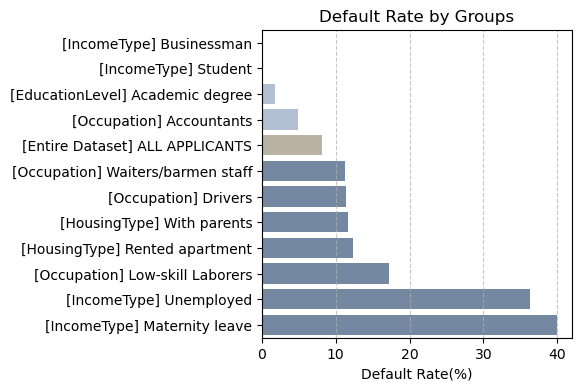

In [50]:
avgRate = float(nGroup.loc[nGroup['Group']=='[Entire Dataset] ALL APPLICANTS','DefaultRate_%'])

# Define bar colors
colors = ['#6e87a9' if rate > avgRate  ##e54545
          else '#adbed7' if rate < avgRate
          else '#bfb3a2'  #'#6e6e6e'
          for rate in nGroup['DefaultRate_%']]

plt.figure(figsize=(4, 4))
sns.barplot(y=nGroup['Group'], x=nGroup['DefaultRate_%'], 
            hue=nGroup['Group'], palette=colors,)

# Labels and title
plt.xlabel('Default Rate(%)')
plt.ylabel('')
plt.title('Default Rate by Groups')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


## 5. Numerical Data Analysis
**Strategy** <br>
Analyze numerical columns individually to identify specific ranges where the default rate is noticeably high or low compared to the overall default rate of the dataset

### 5.1. Identify Numeric Columns

In [51]:
df1.select_dtypes(include=['number']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   CNT_CHILDREN                 307511 non-null  int64  
 3   AMT_INCOME_TOTAL             307511 non-null  float64
 4   AMT_CREDIT                   307511 non-null  float64
 5   AMT_ANNUITY                  307499 non-null  float64
 6   AMT_GOODS_PRICE              307233 non-null  float64
 7   REGION_POPULATION_RELATIVE   307511 non-null  float64
 8   DAYS_BIRTH                   307511 non-null  int64  
 9   DAYS_EMPLOYED                307511 non-null  int64  
 10  DAYS_REGISTRATION            307511 non-null  float64
 11  DAYS_ID_PUBLISH              307511 non-null  int64  
 12  CNT_FAM_MEMBERS              307509 non-null  float64
 13 

In [52]:
numColumn = df1.select_dtypes(include=['number']).columns.tolist()
numColumn

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [53]:
corlist = []
for i in numColumn : 
    if i =='TARGET' :
        continue
    else : 
        corlist.append((i, df1[i].corr(df1['TARGET'])))

pd.DataFrame(data=corlist, columns = ['column', 'Cor with Target'])

,column,Cor with Target
0,SK_ID_CURR,-0.002108
1,CNT_CHILDREN,0.019187
2,AMT_INCOME_TOTAL,-0.003982
3,AMT_CREDIT,-0.030369
4,AMT_ANNUITY,-0.012817
5,AMT_GOODS_PRICE,-0.039645
6,REGION_POPULATION_RELATIVE,-0.037227
7,DAYS_BIRTH,0.078239
8,DAYS_EMPLOYED,-0.044932
9,DAYS_REGISTRATION,0.041975


### 5.2. Credit Amount

#### Overview of the column

In [54]:
pd.set_option('display.float_format', '{:.1f}'.format)
df1['AMT_CREDIT'].describe()

count    307511.0
mean     599026.0
std      402490.8
min       45000.0
25%      270000.0
50%      513531.0
75%      808650.0
max     4050000.0
Name: AMT_CREDIT, dtype: float64

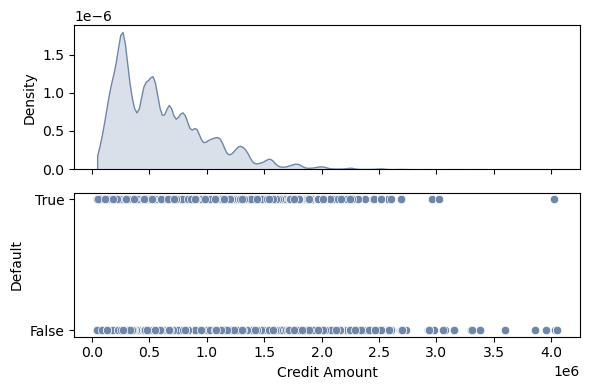

In [74]:
# Set x-axis range
x_min, x_max = df1['AMT_CREDIT'].min(), df1['AMT_CREDIT'].max()

# Create figure with two subplots, sharing the same x-axis
fig, axes = plt.subplots(nrows=2, figsize=(6, 4), sharex=True, gridspec_kw={'height_ratios': [1, 1]})

# KDE plot
sns.kdeplot(x=df1['AMT_CREDIT'], fill=True, clip=(x_min, x_max), ax=axes[0], color='#6e87a9')
axes[0].set_ylabel('Density')

# Scatter plot
sns.scatterplot(x=df1['AMT_CREDIT'], y=df1['TARGET'], ax=axes[1], color='#6e87a9')
axes[1].set_yticks([0, 1])
axes[1].set_yticklabels(["False", "True"])
axes[1].set_ylabel('Default')

# X label
plt.xlabel('Credit Amount')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


#### group by 8-quantiles

In [70]:
amtCredit=df1[['AMT_CREDIT','TARGET']]

In [71]:
q = [amtCredit['AMT_CREDIT'].quantile(i/8) for i in range(1, 9)]

amtCredit['Group'] = amtCredit['AMT_CREDIT'].apply(lambda x : 'Q1' if x <= q[0]
                                                   else 'Q2' if x <= q[1]
                                                   else 'Q3' if x <= q[2]
                                                   else 'Q4' if x <= q[3]
                                                   else 'Q5' if x <= q[4]
                                                   else 'Q6' if x <= q[5]
                                                   else 'Q7' if x <= q[6]
                                                   else 'Q8') 

groupAmtCredit = amtCredit.groupby('Group')['TARGET'].agg([('Repaid', lambda x: (x == 0).sum()),
                                        ('Default', lambda x: (x == 1).sum())]).reset_index()

groupAmtCredit['Total'] = groupAmtCredit['Repaid']+groupAmtCredit['Default']
groupAmtCredit['DefaultRate_%'] = groupAmtCredit['Default']/groupAmtCredit['Total']*100
groupAmtCredit['Range(below)_$']=q
groupAmtCredit=groupAmtCredit[['Group','Range(below)_$','Repaid','Default','Total','DefaultRate_%']]
groupAmtCredit


/var/folders/82/038lb7sx7w981ctcvb0s2px00000gn/T/ipykernel_28696/3098942334.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amtCredit['Group'] = amtCredit['AMT_CREDIT'].apply(lambda x : 'Q1' if x <= q[0]


,Group,Range(below)_$,Repaid,Default,Total,DefaultRate_%
0,Q1,202500.0,35917,2650,38567,6.9
1,Q2,270000.0,36824,3030,39854,7.6
2,Q3,385164.0,33397,3572,36969,9.7
3,Q4,513531.0,34727,3732,38459,9.7
4,Q5,646920.0,34281,4088,38369,10.7
5,Q6,808650.0,36379,3038,39417,7.7
6,Q7,1078200.0,35089,2660,37749,7.0
7,Q8,4050000.0,36072,2055,38127,5.4


/var/folders/82/038lb7sx7w981ctcvb0s2px00000gn/T/ipykernel_28696/2616000219.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=groupAmtCredit, x='Group', y='DefaultRate_%', palette=colors)


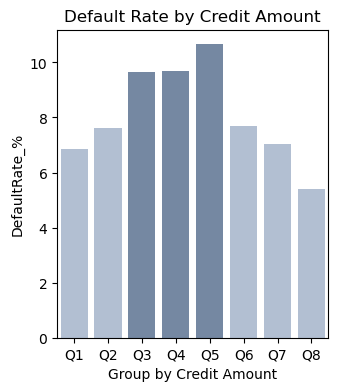

In [73]:
colors = ['#6e87a9' if rate > 8
          else '#adbed7' if rate < 8
          else '#6e6e6e'
          for rate in groupAmtCredit['DefaultRate_%']]

plt.figure(figsize=(3.5,4))
sns.barplot(data=groupAmtCredit, x='Group', y='DefaultRate_%', palette=colors)
plt.title('Default Rate by Credit Amount')
plt.xlabel('Group by Credit Amount')
plt.show()


Default rates show a U-shaped trend across credit amount groups. The lowest rates are in Q1 (6.87%) and Q8 (5.39%), while the highest are in mid-range groups Q3-Q5 (9.66%-10.65%).

Smaller loans may indicate lower risks, and larger loans may reflect more stable borrowers. Mid-range loans likely represent higher-risk borrowers, emphasizing the importance of identifying specific credit amount ranges associated with higher default risks.

### 5.3. Income

In [75]:
pd.set_option('display.float_format', '{:,.0f}'.format)
df[['AMT_INCOME_TOTAL','TARGET']].describe()

,AMT_INCOME_TOTAL,TARGET
count,"307,511","307,511"
mean,"168,798",0
std,"237,123",0
min,"25,650",0
25%,"112,500",0
50%,"147,150",0
75%,"202,500",0
max,"117,000,000",1


<Axes: >

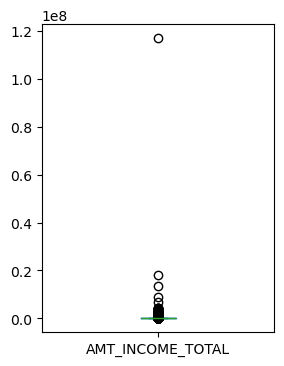

In [76]:
plt.figure(figsize=(3,4))
df['AMT_INCOME_TOTAL'].plot(kind='box')

In [77]:
quantiles=[]

for i in range(1,11) : 
    quantiles.append((f'{i*10}th' , df['AMT_INCOME_TOTAL'].quantile(i/10)))

pd.DataFrame(data=quantiles, columns=['Percentile','Income'])

,Percentile,Income
0,10th,"81,000"
1,20th,"99,000"
2,30th,"112,500"
3,40th,"135,000"
4,50th,"147,150"
5,60th,"162,000"
6,70th,"180,000"
7,80th,"225,000"
8,90th,"270,000"
9,100th,"117,000,000"


In [79]:
# Assuming df is your DataFrame and 'AMT_INCOME_TOTAL' is the column
df['Income_Quantile'] = pd.qcut(df['AMT_INCOME_TOTAL'], q=10)

# Create a summary DataFrame
quantile_summary = df.groupby('Income_Quantile').size().reset_index(name='Count')

# Display the final DataFrame
quantile_summary


/var/folders/82/038lb7sx7w981ctcvb0s2px00000gn/T/ipykernel_28696/371810665.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantile_summary = df.groupby('Income_Quantile').size().reset_index(name='Count')


,Income_Quantile,Count
0,"(25649.999, 81000.0]",33391
1,"(81000.0, 99000.0]",30280
2,"(99000.0, 112500.0]",36907
3,"(112500.0, 135000.0]",48849
4,"(135000.0, 147150.0]",4333
5,"(147150.0, 162000.0]",31120
6,"(162000.0, 180000.0]",30704
7,"(180000.0, 225000.0]",44809
8,"(225000.0, 270000.0]",19957
9,"(270000.0, 117000000.0]",27161


Income of applicants are very centralized in certain area
- One extreme outlier detected (117,000,000).
- 90% of applicants have an income within the range of 0 to 270,000 (270,000 corresponds to the 90th percentile of income).
- A scatterplot of the top 10% of incomes (ranging from the 90th percentile, 270,000, to the maximum value, 117,000,000) reveals that the default rate decreases beyond a certain point.

It seems necessary to split the data into two groups:
- Group A: Bottom 90% of incomes (below 270,000)
- Group B: Top 10% of incomes (above 270,000)


In [80]:
income = df[['AMT_INCOME_TOTAL','TARGET']]
incomeA = df[df['AMT_INCOME_TOTAL']<=df['AMT_INCOME_TOTAL'].quantile(0.9)][['AMT_INCOME_TOTAL','TARGET']]
incomeB = df[(df['AMT_INCOME_TOTAL']>df['AMT_INCOME_TOTAL'].quantile(0.9)) & (df['AMT_INCOME_TOTAL']<df['AMT_INCOME_TOTAL'].quantile(1.0))][['AMT_INCOME_TOTAL','TARGET']]

income.shape[0] == incomeA.shape[0] + incomeB.shape[0] + 1


True

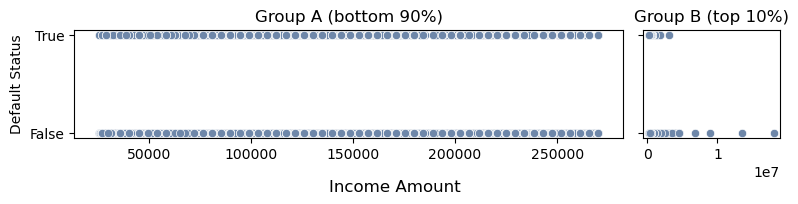

In [83]:
# Create a figure and two subplots
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(8, 2), 
                         gridspec_kw={'width_ratios': [8, 2]})

# First scatter plot
sns.scatterplot(data=incomeA, x='AMT_INCOME_TOTAL', y='TARGET', ax=axes[0], color='#6e87a9')
axes[0].set_title('Group A (bottom 90%)')
axes[0].set_xlabel("")
axes[0].set_ylabel("Default Status")
axes[0].set_yticks([0, 1])
axes[0].set_yticklabels(["False", "True"])

# Second scatter plot
sns.scatterplot(data=incomeB, x='AMT_INCOME_TOTAL', y='TARGET', ax=axes[1], color='#6e87a9')
axes[1].set_title('Group B (top 10%)')
axes[1].set_xlabel("")
axes[1].set_yticks([0, 1])
axes[1].set_yticklabels(["False", "True"])

fig.text(0.5, 0.04, 'Income Amount', ha='center', va='center', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


In [84]:
criteria = [100000, 150000, 200000, 270000]

incomeA['Group'] = incomeA['AMT_INCOME_TOTAL'].apply(lambda x : 'A.1' if x <= criteria[0] 
                                                     else 'A.2' if x <= criteria[1]
                                                     else 'A.3' if x <= criteria[2]
                                                     else 'A.4' )
                                                     

groupIncomeA = incomeA.groupby('Group')['TARGET'].agg([('Repaid', lambda x: (x == 0).sum()),
                                        ('Default', lambda x: (x == 1).sum())]).reset_index()

groupIncomeA['Total'] = groupIncomeA['Repaid']+groupIncomeA['Default']
groupIncomeA['DefaultRate_%'] = groupIncomeA['Default']/groupIncomeA['Total']*100
groupIncomeA['Range(below)_$']=['0.1M','0.15M','0.2M','0.27M']
groupIncomeA = groupIncomeA[['Group','Range(below)_$','Repaid','Default','Total','DefaultRate_%']]
groupIncomeA



,Group,Range(below)_$,Repaid,Default,Total,DefaultRate_%
0,A.1,0.1M,58473,5225,63698,8
1,A.2,0.15M,83697,7894,91591,9
2,A.3,0.2M,58875,5432,64307,8
3,A.4,0.27M,56147,4607,60754,8


In [85]:
incomeB['Group'] = incomeB['AMT_INCOME_TOTAL'].apply(lambda x : 'B.1' if x <= 320000
                                                    else 'B.2' if x <= 400000
                                                    else 'B.3' if x <= 500000
                                                    else 'B.4')

groupIncomeB = incomeB.groupby('Group')['TARGET'].agg([('Repaid', lambda x: (x == 0).sum()),
                                        ('Default', lambda x: (x == 1).sum())]).reset_index()

groupIncomeB['Total'] = groupIncomeB['Repaid']+groupIncomeB['Default']
groupIncomeB['DefaultRate_%'] = groupIncomeB['Default']/groupIncomeB['Total']*100
groupIncomeB['Range(below)_$']=['0.32M','0.4M','0.5M', 'Above 0.5M']
groupIncomeB = groupIncomeB[['Group','Range(below)_$','Repaid','Default','Total','DefaultRate_%']]

groupIncomeB


,Group,Range(below)_$,Repaid,Default,Total,DefaultRate_%
0,B.1,0.32M,10303,717,11020,7
1,B.2,0.4M,7596,482,8078,6
2,B.3,0.5M,5039,322,5361,6
3,B.4,Above 0.5M,2556,145,2701,5


In [87]:
IncomeFinal = pd.DataFrame(data = groupIncomeA.values.tolist() + groupIncomeB.values.tolist(),
                           columns=['Group','Range(below)_$','Repaid','Default','Total','DefaultRate_%'] ) 
IncomeFinal

,Group,Range(below)_$,Repaid,Default,Total,DefaultRate_%
0,A.1,0.1M,58473,5225,63698,8
1,A.2,0.15M,83697,7894,91591,9
2,A.3,0.2M,58875,5432,64307,8
3,A.4,0.27M,56147,4607,60754,8
4,B.1,0.32M,10303,717,11020,7
5,B.2,0.4M,7596,482,8078,6
6,B.3,0.5M,5039,322,5361,6
7,B.4,Above 0.5M,2556,145,2701,5


/var/folders/82/038lb7sx7w981ctcvb0s2px00000gn/T/ipykernel_28696/1626640748.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=IncomeFinal, x='Group', y='DefaultRate_%', palette=colors)


<Axes: xlabel='Group', ylabel='DefaultRate_%'>

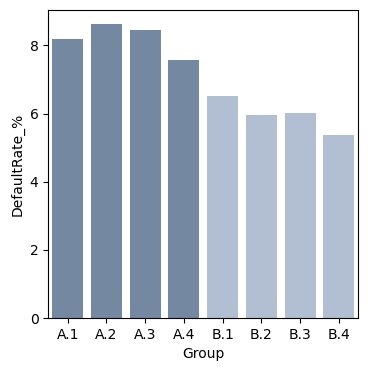

In [88]:
colors = ['#6e87a9' if 'A' in group
          else '#adbed7'
          for group in IncomeFinal['Group']]


plt.figure(figsize=(4,4))
sns.barplot(data=IncomeFinal, x='Group', y='DefaultRate_%', palette=colors)

In [89]:
income.head()

,AMT_INCOME_TOTAL,TARGET
0,"202,500",1
1,"270,000",0
2,"67,500",0
3,"135,000",0
4,"121,500",0


**It was expected that the default rate wouldn’t change until reaching the top 10% of income. However, as shown above, a general trend of decreasing default rates exists across all income ranges. Nevertheless, it is clear that the default rate decreases significantly when entering Group B (the top 10% of income).**

### 5.4. Family

In [90]:
desc('CNT_CHILDREN') , desc('CNT_FAM_MEMBERS')

('Number of children the client has',
 'How many family members does client have')

Text(0, 0.5, 'Number of Children')

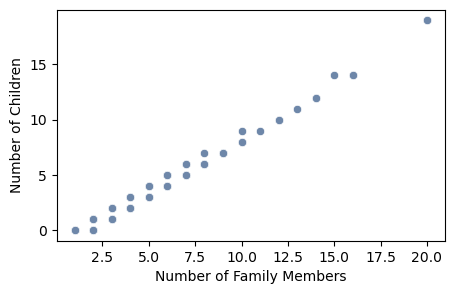

In [91]:
df1[['CNT_FAM_MEMBERS','CNT_CHILDREN','TARGET']]

plt.figure(figsize=(5,3))

sns.scatterplot(x=df1['CNT_FAM_MEMBERS'], y=df1['CNT_CHILDREN'], color='#6e87a9')
plt.xlabel('Number of Family Members')
plt.ylabel('Number of Children')

In [92]:
df['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

In [93]:
children=df[['CNT_CHILDREN','TARGET']]

children['Number of Children'] = children['CNT_CHILDREN'].apply(lambda x: '0' if x == 0 
                                                       else '1' if x == 1
                                                       else '2' if x == 2
                                                       else '3' if x == 3
                                                       else 'Above 3' )
                                                       

childrendf=children.groupby('Number of Children')['TARGET'].agg([('Repaid', lambda x: (x == 0).sum()),
                                  ('Default', lambda x: (x == 1).sum())]).reset_index()
childrendf['Total']=childrendf['Repaid']+childrendf['Default']
childrendf['DefaultRate_%']=childrendf['Default']/childrendf['Total'] * 100
childrendf



/var/folders/82/038lb7sx7w981ctcvb0s2px00000gn/T/ipykernel_28696/1119744099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children['Number of Children'] = children['CNT_CHILDREN'].apply(lambda x: '0' if x == 0


,Number of Children,Repaid,Default,Total,DefaultRate_%
0,0,198762,16609,215371,8
1,1,55665,5454,61119,9
2,2,24416,2333,26749,9
3,3,3359,358,3717,10
4,Above 3,484,71,555,13


/var/folders/82/038lb7sx7w981ctcvb0s2px00000gn/T/ipykernel_28696/3538140339.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=childrendf, x='Number of Children', y='DefaultRate_%',


<Axes: xlabel='Number of Children', ylabel='DefaultRate_%'>

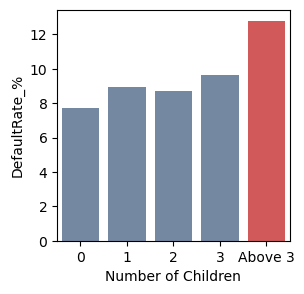

In [94]:
plt.figure(figsize=(3,3))

colors=['#e54545' if x == 'Above 3'
       else '#6e87a9' 
       for x in childrendf['Number of Children']]

sns.barplot(data=childrendf, x='Number of Children', y='DefaultRate_%',
           palette=colors)

In [95]:
a=df[['CNT_FAM_MEMBERS','TARGET']]

a['group'] = a['CNT_FAM_MEMBERS'].apply(lambda x: '1 family' if x == 1 
                                                       else '2 family' if x == 2
                                                       else '3 family' if x == 3
                                                       else '4 family' if x == 4
                                                       else '5 family' if x == 5
                                                       else 'above 5 family')

childrendf=a.groupby('group')['TARGET'].agg([('Repaid', lambda x: (x == 0).sum()),
                                  ('Default', lambda x: (x == 1).sum())]).reset_index()
childrendf['Total']=childrendf['Repaid']+childrendf['Default']
childrendf['DefaultRate_%']=childrendf['Default']/childrendf['Total'] * 100
childrendf

/var/folders/82/038lb7sx7w981ctcvb0s2px00000gn/T/ipykernel_28696/278918127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['group'] = a['CNT_FAM_MEMBERS'].apply(lambda x: '1 family' if x == 1


,group,Repaid,Default,Total,DefaultRate_%
0,1 family,62172,5675,67847,8
1,2 family,146348,12009,158357,8
2,3 family,47993,4608,52601,9
3,4 family,22561,2136,24697,9
4,5 family,3151,327,3478,9
5,above 5 family,461,70,531,13


In [96]:
for i in df1.columns :
    print (i,':', desc(i),'\n')

SK_ID_CURR : ID of loan in our sample 

TARGET : Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases) 

NAME_CONTRACT_TYPE : Identification if loan is cash or revolving 

CODE_GENDER : Gender of the client 

FLAG_OWN_CAR : Flag if the client owns a car 

FLAG_OWN_REALTY : Flag if client owns a house or flat 

CNT_CHILDREN : Number of children the client has 

AMT_INCOME_TOTAL : Income of the client 

AMT_CREDIT : Credit amount of the loan 

AMT_ANNUITY : Loan annuity 

AMT_GOODS_PRICE : For consumer loans it is the price of the goods for which the loan is given 

NAME_TYPE_SUITE : Who was accompanying client when he was applying for the loan 

NAME_INCOME_TYPE : Clients income type (businessman, working, maternity leave,…) 

NAME_EDUCATION_TYPE : Level of highest education the client achieved 

NAME_FAMILY_STATUS : Family status of the client 

NAME_HOU